<a href="https://colab.research.google.com/github/capofwesh20/Analysis-of-NHTSA-complaints/blob/main/Car_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
%%capture
!pip install plotly


In [30]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/modified_data.csv')

In [23]:
df.head()

,Complain ID,MANUFACTURER'S NAME,VEHICLE MAKE,VEHICLE MODEL,MODEL YEAR,WAS VEHICLE INVOLVED IN A CRASH,WAS VEHICLE INVOLVED IN A FIRE,NUMBER OF PERSONS INJURED,NUMBER OF FATALITIES,SPECIFIC COMPONENT'S DESCRIPTION,CONSUMER'S CITY,CONSUMER'S STATE CODE,VEHICLE MILEAGE AT FAILURE,DESCRIPTION OF THE COMPLAINT,WAS INCIDENT REPORTED TO POLICE,ANTI-LOCK BRAKES,CRUISE CONTROL,VEHICLE SPEED,WAS VEHICLE TOWED,Year
0,1633294,Honda (American Honda Motor Co.),HONDA,ACCORD,2018.0,N,N,0,0,SERVICE BRAKES,PHILADELPHIA,PA,4.0,"DRIVING AT THE HIGHWAY, CAR SUDDENLY SLOW DOWN...",N,N,N,68.0,N,2019
1,1633295,Honda (American Honda Motor Co.),HONDA,ACCORD,2018.0,N,N,0,0,ELECTRICAL SYSTEM,PHILADELPHIA,PA,4.0,"DRIVING AT THE HIGHWAY, CAR SUDDENLY SLOW DOWN...",N,N,N,68.0,N,2019
2,1633296,Honda (American Honda Motor Co.),HONDA,ACCORD,2018.0,N,N,0,0,ENGINE,PHILADELPHIA,PA,4.0,"DRIVING AT THE HIGHWAY, CAR SUDDENLY SLOW DOWN...",N,N,N,68.0,N,2019
3,1633297,Ford Motor Company,FORD,EXPLORER,2020.0,N,N,0,0,ELECTRICAL SYSTEM,MEHERRIN,VA,5300.0,DEEP SLEEP MODE ACTIVATES AFTER 2 DAYS. MOST ...,N,N,N,0.0,N,2019
4,1633298,"General Motors, LLC",CHEVROLET,VOLT,2017.0,N,N,0,0,SERVICE BRAKES,SAN ANTONIO,TX,15000.0,"WHILE DRIVING ON CITY STREETS AND HIGHWAYS, TH...",N,N,N,70.0,N,2019


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660739 entries, 0 to 1660738
Data columns (total 20 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   Complain ID                       1660739 non-null  int64  
 1   MANUFACTURER'S NAME               1660739 non-null  object 
 2   VEHICLE MAKE                      1660739 non-null  object 
 3   VEHICLE MODEL                     1660739 non-null  object 
 4   MODEL YEAR                        1660739 non-null  float64
 5   WAS VEHICLE INVOLVED IN A CRASH   1660739 non-null  object 
 6   WAS VEHICLE INVOLVED IN A FIRE    1660739 non-null  object 
 7   NUMBER OF PERSONS INJURED         1660739 non-null  int64  
 8   NUMBER OF FATALITIES              1660739 non-null  int64  
 9   SPECIFIC COMPONENT'S DESCRIPTION  1660739 non-null  object 
 10  CONSUMER'S CITY                   1660739 non-null  object 
 11  CONSUMER'S STATE CODE             166

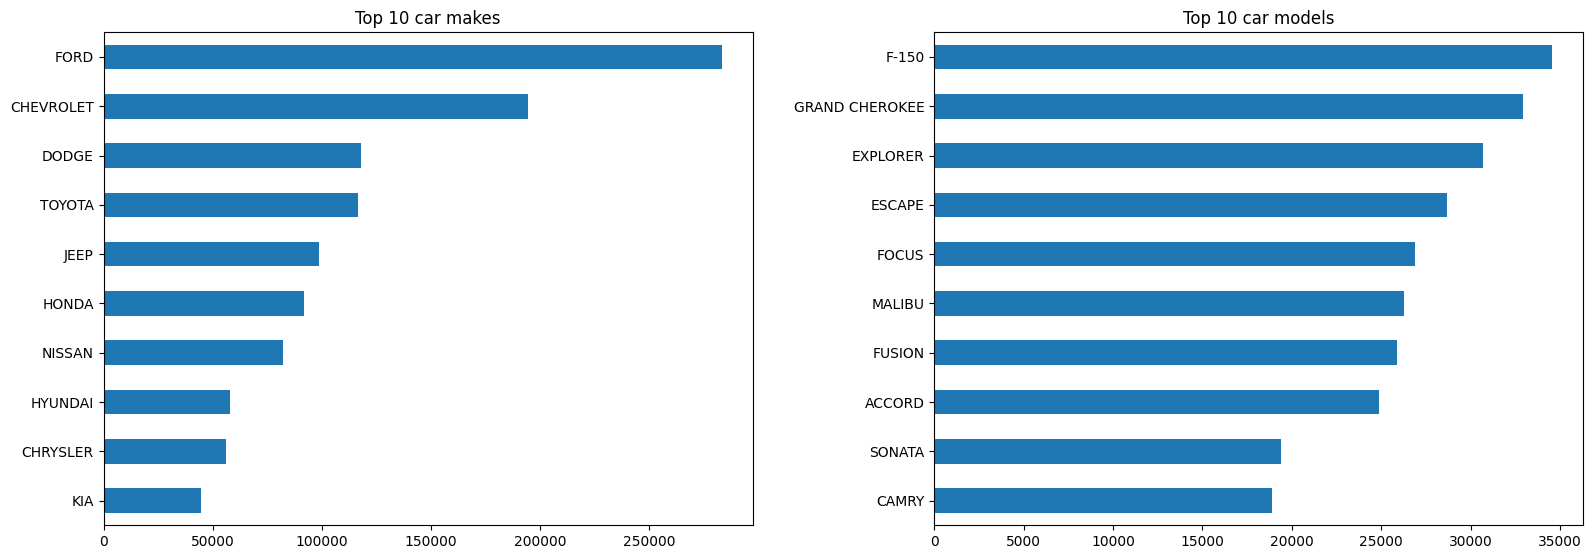

In [ ]:
figure, ((ax1, ax2)) = plt.subplots(ncols=2, figsize=(18,8))
figure.tight_layout(pad=10)
df['VEHICLE MAKE'].value_counts().head(10).sort_values().plot(kind='barh', ax=ax1)
ax1.title.set_text('Top 10 car makes')
df['VEHICLE MODEL'].value_counts().head(10).sort_values().plot(kind='barh', ax=ax2)
ax2.title.set_text('Top 10 car models')
plt.show()

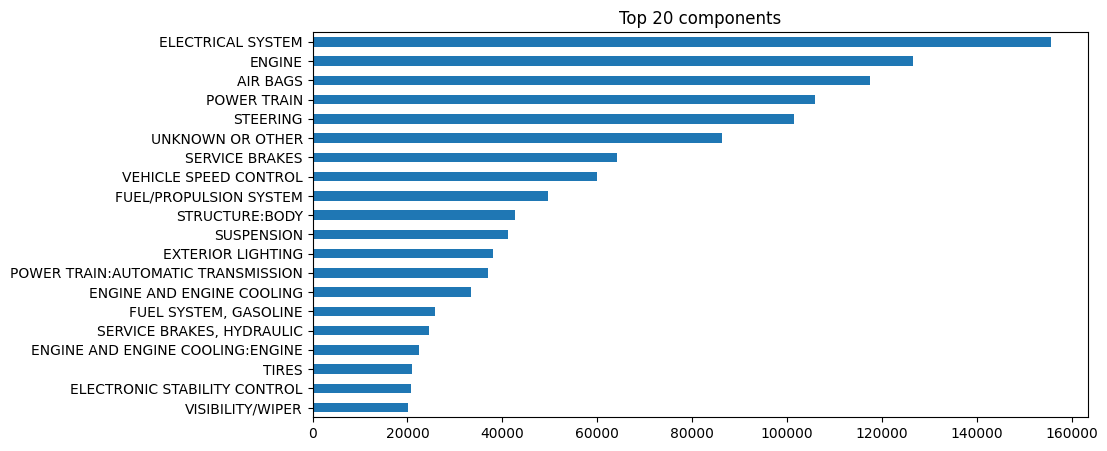

In [ ]:
figure, (ax1) = plt.subplots(ncols=1, figsize=(10,5))
df["SPECIFIC COMPONENT'S DESCRIPTION"].value_counts().head(20).sort_values().plot(kind='barh', ax=ax1)
ax1.title.set_text('Top 20 components')
plt.show()

In [14]:
df["SPECIFIC COMPONENT'S DESCRIPTION"].value_counts()

ELECTRICAL SYSTEM                              151997
ENGINE                                         126453
AIR BAGS                                       112794
POWER TRAIN                                    104023
STEERING                                        99078
                                                ...  
SUSPENSION:FRONT:MOTORCYCLE FORK/SWINGARM           1
BACK OVER PREVENTION: SENSING SYSTEM: LIDAR         1
FORWARD COLLISION AVOIDANCE:SOFTWARE                1
CHILD SEAT:LATCH ADJUSTER                           1
FUEL SYSTEM, OTHER:KINETIC:CLUTCH                   1
Name: SPECIFIC COMPONENT'S DESCRIPTION, Length: 723, dtype: int64

In [9]:

df.query("`SPECIFIC COMPONENT'S DESCRIPTION` == \"UNKNOWN OR OTHER\"").head()


,Complain ID,MANUFACTURER'S NAME,VEHICLE MAKE,VEHICLE MODEL,MODEL YEAR,WAS VEHICLE INVOLVED IN A CRASH,WAS VEHICLE INVOLVED IN A FIRE,NUMBER OF PERSONS INJURED,NUMBER OF FATALITIES,SPECIFIC COMPONENT'S DESCRIPTION,CONSUMER'S CITY,CONSUMER'S STATE CODE,VEHICLE MILEAGE AT FAILURE,DESCRIPTION OF THE COMPLAINT,WAS INCIDENT REPORTED TO POLICE,ANTI-LOCK BRAKES,CRUISE CONTROL,VEHICLE SPEED,WAS VEHICLE TOWED,Year
13,1633307,"Kia America, Inc.",KIA,SOUL,2020.0,N,N,0,0,UNKNOWN OR OTHER,KANKAKEE,IL,NaN,THE CAR WOULD SHUT OFF AND I WILL START IT BAC...,N,N,N,NaN,N,2020
30,1633324,"General Motors, LLC",CHEVROLET,SILVERADO 1500,2019.0,N,N,0,0,UNKNOWN OR OTHER,SULLIVAN,IL,800.0,REAR BACKUP CAMERA SCREEN GETS FUZZY WITH SEVE...,N,N,N,1.0,N,2019
37,1633331,"Chrysler (FCA US, LLC)",CHRYSLER,PACIFICA,2017.0,N,N,0,0,UNKNOWN OR OTHER,ALMA,AR,65961.0,WHILE VEHICLE IS BOTH STATIONARY AND MOVING TH...,N,N,N,NaN,N,2020
44,1633338,Toyota Motor Corporation,TOYOTA,HIGHLANDER,2019.0,N,N,0,0,UNKNOWN OR OTHER,SUGAR LAND,TX,75.0,"LOUD WIN NOISE WHILE DRIVING ON A FREEWAY, I M...",N,N,N,65.0,N,2019
47,1633341,"General Motors, LLC",GMC,ACADIA,2017.0,N,N,0,0,UNKNOWN OR OTHER,AVON,OH,5400.0,THE VEHICLE HAS HAD ONGOING ISSUES SINCE IT WA...,N,N,N,15.0,N,2017


In [10]:
df.query("`SPECIFIC COMPONENT'S DESCRIPTION` == \"UNKNOWN OR OTHER\"").shape

(80853, 20)

In [13]:
df["SPECIFIC COMPONENT'S DESCRIPTION"].value_counts()

ELECTRICAL SYSTEM                              151997
ENGINE                                         126453
AIR BAGS                                       112794
POWER TRAIN                                    104023
STEERING                                        99078
                                                ...  
SUSPENSION:FRONT:MOTORCYCLE FORK/SWINGARM           1
BACK OVER PREVENTION: SENSING SYSTEM: LIDAR         1
FORWARD COLLISION AVOIDANCE:SOFTWARE                1
CHILD SEAT:LATCH ADJUSTER                           1
FUEL SYSTEM, OTHER:KINETIC:CLUTCH                   1
Name: SPECIFIC COMPONENT'S DESCRIPTION, Length: 723, dtype: int64

In [ ]:
# Calculate the number of complaints, incidents involving crashes, incidents involving fires, and fatalities per year
complaints_per_year = df.groupby('Year').size()
crashes_per_year = df[df['WAS VEHICLE INVOLVED IN A CRASH'] == 'Y'].groupby('Year').size()
fires_per_year = df[df['WAS VEHICLE INVOLVED IN A FIRE'] == 'Y'].groupby('Year').size()
fatalities_per_year = df.groupby('Year')['NUMBER OF FATALITIES'].sum()



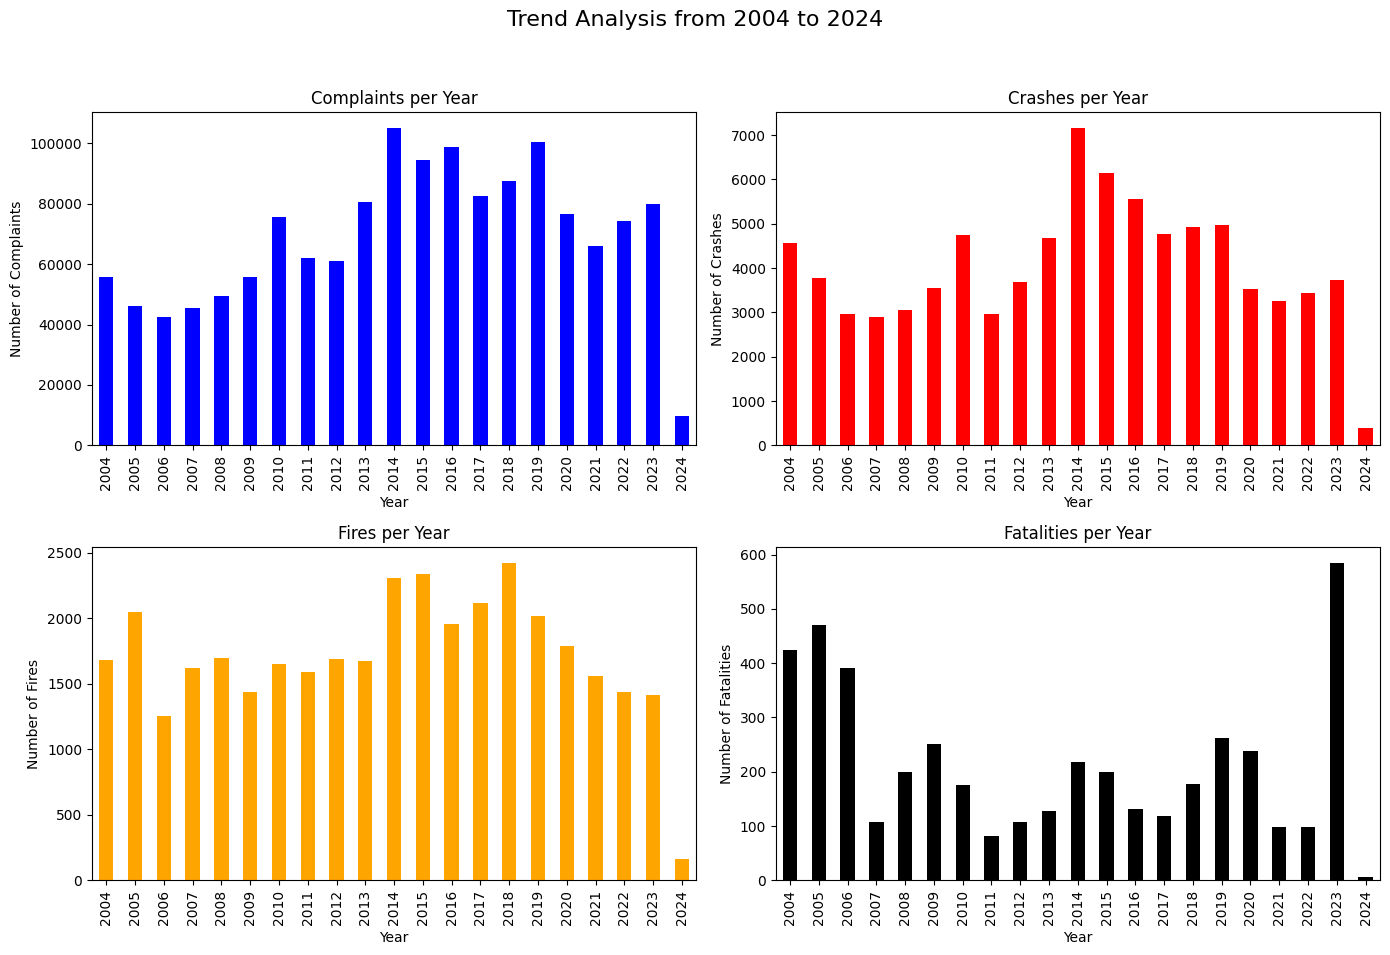

In [ ]:


# Now let's create bar charts
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Trend Analysis from 2004 to 2024', fontsize=16)

# Number of complaints per year
complaints_per_year = df['Year'].value_counts().sort_index()
complaints_per_year.plot(kind='bar', ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Complaints per Year')
axes[0, 0].set_ylabel('Number of Complaints')
axes[0, 0].set_xlabel('Year')

# Crashes per year
crashes_per_year = df[df['WAS VEHICLE INVOLVED IN A CRASH'] == 'Y']['Year'].value_counts().sort_index()
crashes_per_year.plot(kind='bar', ax=axes[0, 1], color='red')
axes[0, 1].set_title('Crashes per Year')
axes[0, 1].set_ylabel('Number of Crashes')
axes[0, 1].set_xlabel('Year')

# Fires per year
fires_per_year = df[df['WAS VEHICLE INVOLVED IN A FIRE'] == 'Y']['Year'].value_counts().sort_index()
fires_per_year.plot(kind='bar', ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Fires per Year')
axes[1, 0].set_ylabel('Number of Fires')
axes[1, 0].set_xlabel('Year')

# Fatalities per year
fatalities_per_year = df.groupby('Year')['NUMBER OF FATALITIES'].sum()
fatalities_per_year.plot(kind='bar', ax=axes[1, 1], color='black')
axes[1, 1].set_title('Fatalities per Year')
axes[1, 1].set_ylabel('Number of Fatalities')
axes[1, 1].set_xlabel('Year')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust the layout to make room for the suptitle
plt.show()


In [ ]:


# Group by 'VEHICLE MAKE' and count the complaints
make_complaints = df.groupby('VEHICLE MAKE')['Complain ID'].count().reset_index(name='Complaint Count')

# Sort the makes by the number of complaints and get the top 10
top_makes = make_complaints.sort_values(by='Complaint Count', ascending=False).head(10)

# Now for each of these makes, find the year with the most complaints
top_make_years = pd.DataFrame()

for make in top_makes['VEHICLE MAKE']:
    # Filter the DataFrame to only this make
    make_df = df[df['VEHICLE MAKE'] == make]

    # Group by 'YEAR' and count the complaints for this make
    year_complaints = make_df.groupby('Year')['Complain ID'].count().reset_index(name='Complaint Count')

    # Find the year with the maximum complaints for this make
    max_year_index = year_complaints['Complaint Count'].idxmax()
    max_complaints_year = year_complaints.loc[[max_year_index]]


    max_complaints_year = max_complaints_year.assign(**{'VEHICLE MAKE': make})

    # Add the make and the year with the max complaints to the new DataFrame
    top_make_years = pd.concat([top_make_years, max_complaints_year], ignore_index=True)

# Sort the result to have the make with the overall most complaints at the top
top_make_years = top_make_years.sort_values(by='Complaint Count', ascending=False)

# Select only the relevant columns to display
top_make_years = top_make_years[['VEHICLE MAKE', 'Year', 'Complaint Count']]



In [ ]:
top_make_years

,VEHICLE MAKE,Year,Complaint Count
0,FORD,2019,17471
1,CHEVROLET,2014,15065
2,TOYOTA,2010,10992
3,DODGE,2015,10283
4,JEEP,2014,9361
5,HONDA,2023,6848
8,CHRYSLER,2015,6082
6,NISSAN,2019,5950
7,HYUNDAI,2023,5886
9,KIA,2023,4967


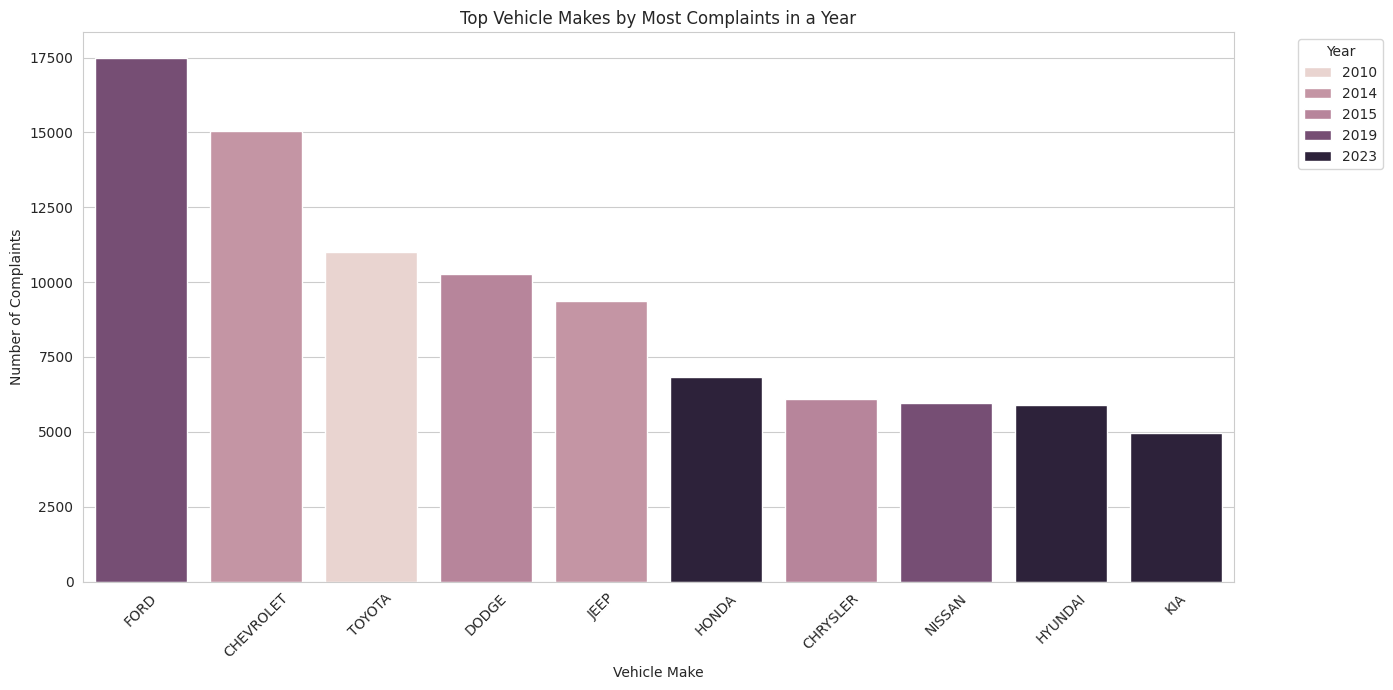

In [ ]:

# Set the visual style of the plots
sns.set_style("whitegrid")

# Create a bar chart
plt.figure(figsize=(14, 7))
barplot = sns.barplot(
    data=top_make_years,
    x='VEHICLE MAKE',
    y='Complaint Count',
    hue='Year',  # Color bars by the year
    dodge=False  # Place all bars for each make side-by-side
)

# Add a title and labels to the plot
plt.title('Top Vehicle Makes by Most Complaints in a Year')
plt.xlabel('Vehicle Make')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Position the legend
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


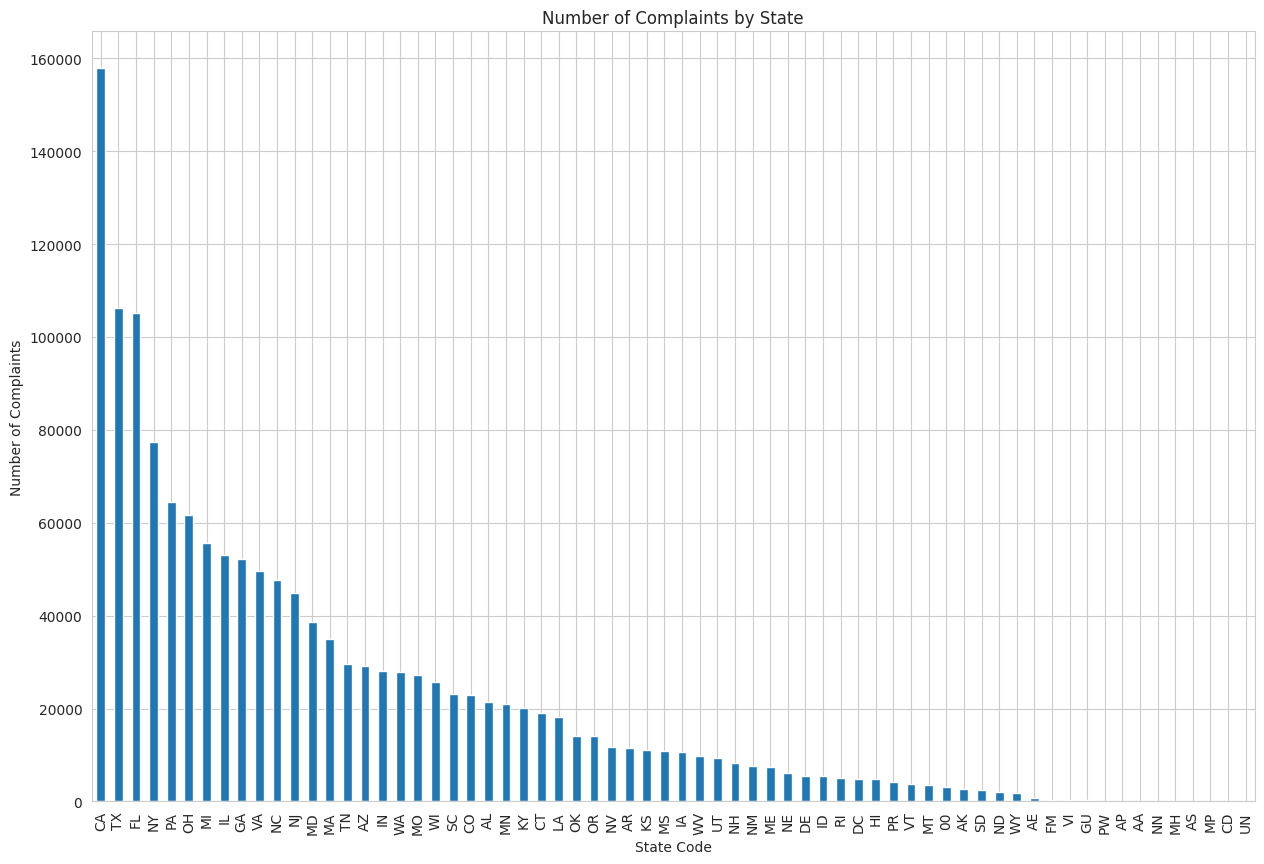

In [ ]:

complaints_by_state = df["CONSUMER'S STATE CODE"].value_counts()

# Now let's visualize the number of complaints by state using a bar chart
plt.figure(figsize=(15, 10))
complaints_by_state.plot(kind='bar')
plt.title('Number of Complaints by State')
plt.xlabel('State Code')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)  # Rotate the state codes for better readability
plt.show()


perform hypothesis testing (e.g., chi-squared tests for categorical variables or t-tests for continuous variables) to determine if the differences in rates are statistically significant.

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table for crashes and anti-lock brakes
contingency_table = pd.crosstab(df['WAS VEHICLE INVOLVED IN A CRASH'], df['ANTI-LOCK BRAKES'])



In [ ]:
contingency_table

ANTI-LOCK BRAKES,0,1
WAS VEHICLE INVOLVED IN A CRASH,,
0,1230406,132931
1,73250,11471


In [ ]:
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the p-value
print(f'Chi-squared test p-value: {p}')


Chi-squared test p-value: 2.5931850365069717e-279



A chi-squared test p-value of
2.593
×
1
0
−
279
2.593×10
−279
  is extremely small—essentially zero for all practical purposes. In hypothesis testing, a p-value is the probability of observing the test results under the null hypothesis, which usually states that there is no association between the variables tested.

In this context, such a minuscule p-value suggests that the null hypothesis (which would claim there is no association between the presence of anti-lock brakes and the incidence of crashes) can be rejected with very high confidence. This indicates that there is a statistically significant association between the two variables in your dataset.

Given the p-value is well below the common alpha level of 0.05, you have very strong evidence against the null hypothesis. This means that the presence or absence of anti-lock brakes is associated with whether or not the vehicle was involved in a crash, according to your dataset.

In [ ]:
contingency_table = pd.crosstab(df['WAS VEHICLE INVOLVED IN A CRASH'], df['CRUISE CONTROL'])

In [ ]:
contingency_table

CRUISE CONTROL,0,1
WAS VEHICLE INVOLVED IN A CRASH,,
0,1221872,141465
1,72872,11849


In [ ]:
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the p-value
print(f'Chi-squared test p-value: {p}')


Chi-squared test p-value: 1.2137613668986797e-240


In [4]:
filtered_df = df.query("`VEHICLE MAKE` == 'FORD'")

In [19]:
filtered_df.head()

,Complain ID,MANUFACTURER'S NAME,VEHICLE MAKE,VEHICLE MODEL,MODEL YEAR,WAS VEHICLE INVOLVED IN A CRASH,WAS VEHICLE INVOLVED IN A FIRE,NUMBER OF PERSONS INJURED,NUMBER OF FATALITIES,SPECIFIC COMPONENT'S DESCRIPTION,CONSUMER'S CITY,CONSUMER'S STATE CODE,VEHICLE MILEAGE AT FAILURE,DESCRIPTION OF THE COMPLAINT,WAS INCIDENT REPORTED TO POLICE,ANTI-LOCK BRAKES,CRUISE CONTROL,VEHICLE SPEED,WAS VEHICLE TOWED,Year
3,1633297,Ford Motor Company,FORD,EXPLORER,2020.0,N,N,0,0,ELECTRICAL SYSTEM,MEHERRIN,VA,5300.0,DEEP SLEEP MODE ACTIVATES AFTER 2 DAYS. MOST ...,N,N,N,0.0,N,2019
26,1633320,Ford Motor Company,FORD,F-350,2017.0,N,N,0,0,STEERING,CUMMING,GA,36600.0,"WE HAD A FRONT STEERING OSCILLATION, AKA ""DEAT...",N,N,N,55.0,N,2019
28,1633322,Ford Motor Company,FORD,ESCAPE,2014.0,N,N,0,0,POWER TRAIN,INGLEWOOD,CA,71000.0,ON 12/31/19 WHILE DRIVING ON PCH THE THE WOULD...,N,N,N,40.0,N,2019
48,1633342,Ford Motor Company,FORD,FOCUS,2005.0,N,N,0,0,WHEELS,BOULDER CITY,NV,106125.0,"ON JULY 7, 2015, I BOUGHT 4 TIRES 117632 AFFI...",N,N,N,0.0,N,2019
57,1633351,Ford Motor Company,FORD,F-150,2013.0,N,N,0,0,POWER TRAIN,LEAGUE CITY,TX,NaN,FORD IS NOT COMING OUT WITH NEW SOFTWARE FOR T...,N,N,N,NaN,N,2019


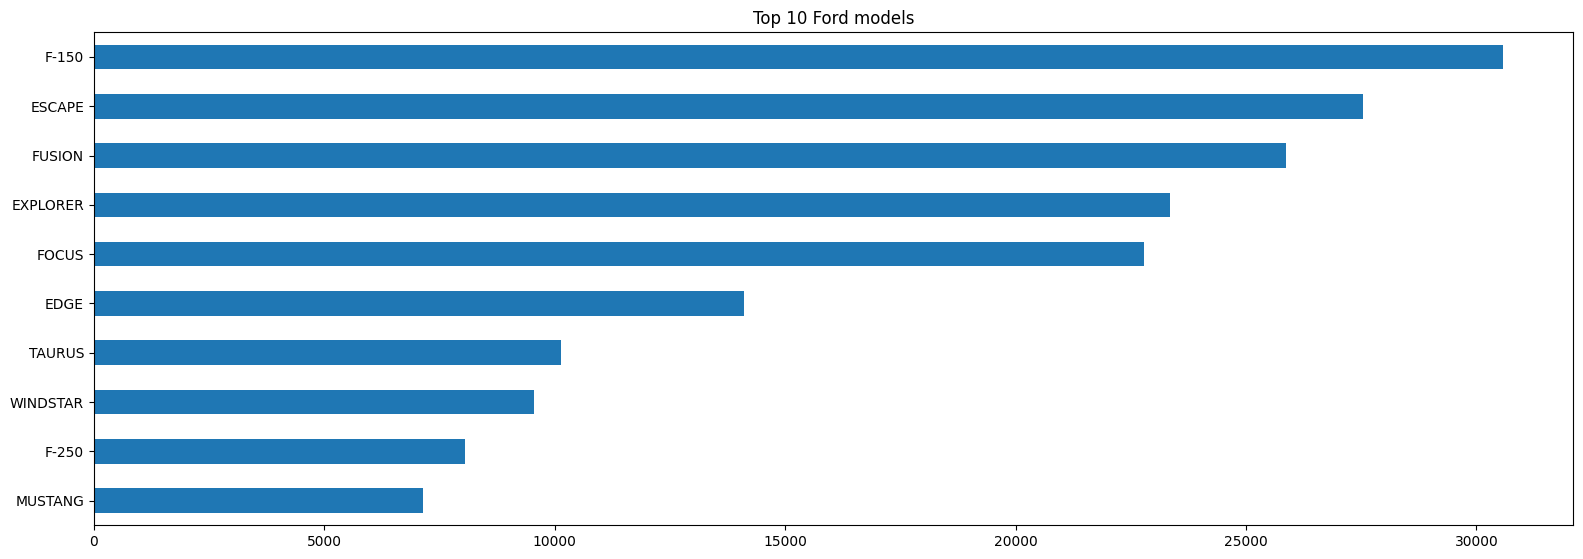

In [23]:
figure, ax = plt.subplots(figsize=(18,8))
figure.tight_layout(pad=10)


filtered_df['VEHICLE MODEL'].value_counts().head(10).sort_values().plot(kind='barh')
ax.title.set_text('Top 10 Ford models')
plt.show()

In [5]:
filtered_df = filtered_df.query("Year == 2019")

In [8]:

# Now group by 'VEHICLE MODEL' to see the complaint counts per model
model_complaints = filtered_df.groupby('VEHICLE MODEL')['Complain ID'].count().reset_index(name='Complaint Count')

# Sort the models by the number of complaints
model_complaints_sorted = model_complaints.sort_values(by='Complaint Count', ascending=False)

# Display the sorted DataFrame
model_complaints_sorted.head()


,VEHICLE MODEL,Complaint Count
29,F-150,2662
45,FOCUS,2465
50,FUSION,2360
18,ESCAPE,2129
30,F-250,1635


In [13]:
top_10_models = model_complaints_sorted.head(10)

fig = px.bar(top_10_models,
             x='VEHICLE MODEL',
             y='Complaint Count',
             text='Complaint Count',
             color='Complaint Count',
             title='Top 10 Ford Models by Number of Complaints in 2019',
             labels={'Complaint Count':'Number of Complaints', 'VEHICLE MODEL':'Vehicle Model'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', xaxis_tickangle=-45)

fig.show()


In [41]:
models = ['F-150', 'FOCUS', 'FUSION']
top_model_years = pd.DataFrame()

for model in models:
    # Filter the DataFrame for the current model
    model_data = filtered_df[filtered_df['VEHICLE MODEL'] == model]

    # Group by 'MODEL YEAR' and count the complaints for this model
    year_complaints = model_data.groupby('MODEL YEAR')['Complain ID'].count().reset_index(name='Complaint Count')

    # Sort the years by the number of complaints and get the top 3
    top_years = year_complaints.sort_values(by='Complaint Count', ascending=False).head(2)

    # Add the model name to the DataFrame for clarity
    top_years['VEHICLE MODEL'] = model

    # Append the result to the top_model_years DataFrame
    top_model_years = pd.concat([top_model_years, top_years], ignore_index=True)


In [42]:
# Sort by model and then by complaint count within each model
top_model_years = top_model_years.sort_values(by=['VEHICLE MODEL', 'Complaint Count'], ascending=[True, False])


In [44]:
top_model_years

,MODEL YEAR,Complaint Count,VEHICLE MODEL
0,2013.0,581,F-150
1,2018.0,291,F-150
2,2015.0,288,F-150
3,2012.0,664,FOCUS
4,2014.0,577,FOCUS
5,2013.0,384,FOCUS
6,2010.0,463,FUSION
7,2013.0,330,FUSION
8,2011.0,292,FUSION


In [48]:

fig = px.bar(top_model_years, x='VEHICLE MODEL', y='Complaint Count', color='MODEL YEAR', barmode='stack',
             title="Top 3 Model Years with Most Complaints for F-150, Focus, and Fusion",
             labels={'Complaint Count':'Number of Complaints', 'MODEL YEAR':'Model Year'})

fig.update_layout(xaxis_title="Vehicle Model", yaxis_title="Number of Complaints")
fig.show()


In [55]:

model = 'F-150'
years = [2013, 2015, 2018]

# Placeholder for the results
top_complaints_by_year = []

for year in years:
    # Filter the DataFrame for the specific model and year
    filtered_data = filtered_df[(filtered_df['VEHICLE MODEL'] == model) & (filtered_df['MODEL YEAR'] == year)]

    # Count the occurrences of each SPECIFIC COMPONENT'S DESCRIPTION and get the top 3
    top_complaints = filtered_data['SPECIFIC COMPONENT\'S DESCRIPTION'].value_counts().head(3).reset_index()
    top_complaints.columns = ['SPECIFIC COMPONENT\'S DESCRIPTION', 'Count']

    # Add year information for clarity
    top_complaints['MODEL YEAR'] = year

    # Append to the list
    top_complaints_by_year.append(top_complaints)

# Concatenate all results into a single DataFrame
top_complaints_df = pd.concat(top_complaints_by_year, ignore_index=True)




In [56]:
top_complaints_df

,SPECIFIC COMPONENT'S DESCRIPTION,Count,MODEL YEAR
0,POWER TRAIN,224,2013
1,ENGINE,63,2013
2,VEHICLE SPEED CONTROL,44,2013
3,SERVICE BRAKES,89,2015
4,ENGINE,35,2015
5,UNKNOWN OR OTHER,22,2015
6,STRUCTURE:BODY,57,2018
7,POWER TRAIN,54,2018
8,ENGINE,44,2018


In [57]:
models_years = {
    'F-150': [2013, 2015, 2018],
    'FUSION': [2010, 2011, 2013],
    'FOCUS': [2012, 2013, 2014]
}

# Placeholder for the results
top_complaints_by_model_year = []

for model, years in models_years.items():
    for year in years:
        # Filter the DataFrame for the specific model and year
        filtered_data = filtered_df[(filtered_df['VEHICLE MODEL'] == model) & (filtered_df['MODEL YEAR'] == year)]

        # Count the occurrences of each SPECIFIC COMPONENT'S DESCRIPTION and get the top 3
        top_complaints = filtered_data['SPECIFIC COMPONENT\'S DESCRIPTION'].value_counts().head(3).reset_index()
        top_complaints.columns = ['SPECIFIC COMPONENT\'S DESCRIPTION', 'Count']

        # Add model and year information for clarity
        top_complaints['VEHICLE MODEL'] = model
        top_complaints['MODEL YEAR'] = year

        # Append to the list
        top_complaints_by_model_year.append(top_complaints)

# Concatenate all results into a single DataFrame
top_complaints_df = pd.concat(top_complaints_by_model_year, ignore_index=True)




In [59]:
# Display the result
top_complaints_df

,SPECIFIC COMPONENT'S DESCRIPTION,Count,VEHICLE MODEL,MODEL YEAR
0,POWER TRAIN,224,F-150,2013
1,ENGINE,63,F-150,2013
2,VEHICLE SPEED CONTROL,44,F-150,2013
3,SERVICE BRAKES,89,F-150,2015
4,ENGINE,35,F-150,2015
5,UNKNOWN OR OTHER,22,F-150,2015
6,STRUCTURE:BODY,57,F-150,2018
7,POWER TRAIN,54,F-150,2018
8,ENGINE,44,F-150,2018
9,STEERING,238,FUSION,2010


In [60]:
fig = px.bar(top_complaints_df,
             x="VEHICLE MODEL",
             y="Count",
             color="SPECIFIC COMPONENT'S DESCRIPTION",
             facet_col="MODEL YEAR",  # Creates a separate subplot for each model year
             title="Top 3 Specific Component Complaints for Selected Ford Models and Years",
             category_orders={"MODEL YEAR": sorted(top_complaints_df['MODEL YEAR'].unique())})  # Sort the model years

fig.update_layout(xaxis_title="Vehicle Model",
                  yaxis_title="Number of Complaints",
                  legend_title="Specific Component")
fig.update_xaxes(tickangle=-45)
fig.show()
